In [1]:
# comments from hw1

# the following are equivalent:

### from string import punctuation

### import string
### punctuation = string.punctuation
### del string

# because of this, it is *less efficient* to do this than to simply import all of string!

In [2]:
r = range(2,7,2)
# this ...
for i in r:
    print(i)

2
4
6


In [3]:
# is equivalent to this:
for i in iter(r):
    print(i)

2
4
6


In [4]:
# observe
list(iter(r))

[2, 4, 6]

In [5]:
# object: dictionaries
# the keys of a dictionary can be any immutable object (and hence uniquely identifiable)
dict = {(1,2):'a', (2,1):'b'} # we can't use the dict((1,2)='a', (2,1)='b') syntax
dict.keys() + dict.values()

[(1, 2), (2, 1), 'a', 'b']

In [6]:
l1 = list(range(17, 460, 2))
l2 = list(range(13, 550, 3))
# how do we find the common elements? can cast as a set!

In [7]:
%%timeit
set(l1).intersection(l2) # searching in a set is an O(1) operation (all in C!)
# there is no intersection method in list, and also searching through a list is an O(n) operation

100000 loops, best of 3: 9.49 µs per loop


In [8]:
%%timeit
# compare this to:
[i for i in l1 if i in l2]

1000 loops, best of 3: 409 µs per loop


In [9]:
# moral: to create a set from a list, it's an O(n^2) operation, though!
# you form a set sequentially from the first i elements, then tries to add the (i+1)-st, checking for uniqueness
# in this case, if we started with lists, it was actually *FASTER* to loop through the lists

In [10]:
# moral: dictionary get is slow!
record = {'first':'James', 'middle':'Clerk', 'last':'Maxwell'}
record.get('middle','NMN') # this returns the value for the 'middle' key, but defaults to 'NMN' if the key is not found

'Clerk'

In [11]:
%%timeit
record.get('birthday','N/A')

The slowest run took 18.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 97.8 ns per loop


In [12]:
%%timeit
record['birthday'] if 'birthday' in record else 'N/A'

10000000 loops, best of 3: 37 ns per loop


In [13]:
# object: sets
s = set() ; s# empty set

set()

In [14]:
t = set([1,2,3,1,123,1,4123,1,23,12,3,123,2]) ; t

{1, 2, 3, 12, 23, 123, 4123}

In [15]:
# pop removes a random element!
t.pop() ; t

{2, 3, 12, 23, 123, 4123}

In [16]:
# select the correct data type: list, tuple, set, frozen set, dict
# a frozen set is an immutable set
# typically, there are immutable counterparts to data structures in python

In [17]:
# if/elif/else statements
if True: # the condition can be any object! the condition becomes bool(object)
  print('yes')
else: 
  print('no');

yes


In [18]:
x = {}
if x:
  print('There is something in the set')
else:
  print('The set is empty')

The set is empty


In [19]:
# better practice to test for the number of items x contains
len(x)

0

In [20]:
# this is because python is very permissive;
# the code will work for more objects than you initially intended for

In [21]:
list(enumerate(range(4,56,3)))

[(0, 4),
 (1, 7),
 (2, 10),
 (3, 13),
 (4, 16),
 (5, 19),
 (6, 22),
 (7, 25),
 (8, 28),
 (9, 31),
 (10, 34),
 (11, 37),
 (12, 40),
 (13, 43),
 (14, 46),
 (15, 49),
 (16, 52),
 (17, 55)]

In [22]:
# for loops can be very slow
# moral: try to use fewer (C) operations via list comprehension and map

In [23]:
%%timeit
# this is bad
output = []
for integer in range(100):
  output.append(integer*integer) # this is allocating unecessary memory

100000 loops, best of 3: 11.2 µs per loop


In [24]:
%%timeit
x = range(100)
y = [0]*len(x) # a result array of the right size
for i,j in enumerate(x):
  y[i] = j*j

100000 loops, best of 3: 9.05 µs per loop


In [28]:
%%timeit
[i*i for i in x] # list comprehension

The slowest run took 24.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 60.6 ns per loop


In [29]:
#%%timeit
g = (i*i for i in x) # this is a generator!
next(g)

StopIteration: 

In [30]:
# list comprehension has built in overhead as compared to a for loop

In [31]:
%%timeit
list(map(lambda i:i*i, x))

The slowest run took 6.95 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 367 ns per loop


In [32]:
# exercise (page 77)
values = [-4, 5, -1, -2, 10, 3, 12, -45, 13, 12, -53]
# determine the postive values and the negative values

In [33]:
%%timeit
positives = []
negatives = []
for term in values:
  if term > 0:
    positives.append(term)
  else:
    negatives.append(term)

1000000 loops, best of 3: 1.38 µs per loop


In [34]:
%%timeit
# moral: list comprehension! 
positives = []
negatives = [i for i in values if i<0 or positives.append(i)] 
# each time the condition positives.append(i) is checked, the append function is called! 
# it always returns None, and bool(None) is false

1000000 loops, best of 3: 1.42 µs per loop


In [35]:
bool([].append(1))

False

In [36]:
# return the square of the positive numbers
[i if i>0 else i*i for i in values]

[16, 5, 1, 4, 10, 3, 12, 2025, 13, 12, 2809]

In [37]:
# moral: python is built as a natural language syntax; code is designed to be quite readable
# the more readable the code, the more efficient the underlying C operations should be
# the builtins are made so that the code reflects natural English grammar

In [38]:
# we can iterate list comprehension/filters
# moral: use immutable objects for efficiency
numbers = range(3,1000,13)

In [39]:
%%timeit
[i**.5 for i in [j*j for j in numbers]]

10000 loops, best of 3: 17.9 µs per loop


In [40]:
%%timeit
[i**.5 for i in (j*j for j in numbers)]

10000 loops, best of 3: 17.9 µs per loop


In [41]:
%%timeit
squared = (j*j for j in numbers) # generator; it's more readable this way
[i**.5 for i in squared]

100000 loops, best of 3: 19.9 µs per loop


In [42]:
%%timeit
(i**.5 for i in [j*j for j in numbers])

100000 loops, best of 3: 5.04 µs per loop


In [43]:
%%timeit
(i**.5 for i in (j*j for j in numbers))

The slowest run took 4.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1 µs per loop


In [44]:
%%timeit
squared = (j*j for j in numbers)
(i**.5 for i in squared)

1000000 loops, best of 3: 784 ns per loop


In [45]:
# looping over dictionaries
d = {'a':1,'b':2,'c':3}

In [46]:
%%timeit
# loop over dictionary automatically loops over keys
for key in d:
  temp = key

The slowest run took 9.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 111 ns per loop


In [47]:
%%timeit
# moral: specifying the loop over d.keys() is slower, since we create a python object d.keys()!
for key in d.keys():
  temp = key

The slowest run took 5.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 213 ns per loop


In [48]:
# exercise
values = {'A':-4, 'B':10, 'C':-5, 'D':3}
# use a loop to build a dictionary containing only the keys and values which are positive

In [49]:
{i:j for i,j in values.items() if j>0} # dictionary comprehension

{'B': 10, 'D': 3}

In [52]:
# Python 3 dictionary initialization
# dict((i,j) for i,j in values.items() if j>0)

In [53]:
# functions
def add(arg0, arg1):
  '''Add two numbers'''
  return arg0 + arg1 

In [54]:
help(add)

Help on function add in module __main__:

add(arg0, arg1)
    Add two numbers



In [55]:
add(2,3), add('hello ','world')

(5, 'hello world')

In [56]:
# we'd say that this even has a permissivity bug, 
# because it doesnt match the intent of the function as noted in its __doc__
# functions
def add(arg0, arg1):
  '''Add two numbers'''
  return arg0 + arg1 + 0

In [57]:
add('hello ','world') # is no longer allowed

TypeError: cannot concatenate 'str' and 'int' objects

In [58]:
# exercise (pg 86)
# create a function called count_character that takes a string and a character,
# returning the number of times the character appears in the string; 
# if no character is specified, count the length of the string

In [59]:
def count_character(string,character=''):
  '''Count how many times character appears in string, 
  ignoring case of letters in string and also ignoring case of character
  (if character is not specified, return the length of the string)'''
  g = [i for i in string.lower() if i==character.lower()]
  return (not bool(character))*len(string) + bool(character)*len(g)

In [60]:
count_character('Php or Python?','p')

3

In [61]:
count_character('Php or Python?')

14

In [62]:
count_character('lweflakmsvpowkgwpromfwrmar','L')

2

In [63]:
help(count_character)

Help on function count_character in module __main__:

count_character(string, character='')
    Count how many times character appears in string, 
    ignoring case of letters in string and also ignoring case of character
    (if character is not specified, return the length of the string)



In [64]:
# alternative solution
def count_character_alternative(string,character):
  '''See count_character(string,character)'''
  return len(string) if character is None else string.lower().count(character.lower())

In [65]:
count_character_alternative('Php or python?','p')

3

In [66]:
# moral: unit tests are exactly the tests you used to create the function!
assert count_character("Php or python?",'p') == 3
assert count_character("Php or python?") == 14

In [67]:
# here is a failed unit test
assert count_character("Php or python?") == 12

AssertionError: 

In [68]:
# default initialization is flexible!
def quad(x, a=1, b=2, c=3):
    return a * x**2 + b * x + c

In [69]:
quad(3), quad(3, b=5, c=1), quad(3, c=4)

(18, 25, 19)

In [70]:
# defaults can be respecified, and in any order!
# this is because the default parameter keys and values form a dictionary!
quad(3, b=4), quad(3, c=3, a=1)

(24, 18)

In [71]:
# object-oriented programming

In [75]:
# error catching
try:
    x =1
    x + 's'
except TypeError:
    print('oops')

oops


In [77]:
import numpy as np
x = np.array([0,1,2,3,4,5,6,7]) ; x

array([0, 1, 2, 3, 4, 5, 6, 7])

In [83]:
x.ndim, x.shape # ndim is not actually stored; shape is stored

(1, (8L,))

In [86]:
x.strides

(4L,)

In [87]:
x.shape = (4,2) ; x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [89]:
x.shape = (1,8) ; x

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [100]:
x.T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [98]:
x.shape

(1L, 8L)

In [99]:
# contrast the transpose behavior to matlab: 
# transpose of a 1d array is stilla  1d array
np.atleast_2d(x).T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [101]:
3*x - 2*x**2 + 1

array([[  1,   2,  -1,  -8, -19, -34, -53, -76]])

In [107]:
x.shape = (2,4) ; x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [111]:
y = (x + 1).T[:2] ; y

array([[1, 5],
       [2, 6]])

In [112]:
z = (x *4).T[2:] ; z

array([[ 8, 24],
       [12, 28]])

In [114]:
y * z # is element by element matrix multiplication

array([[  8, 120],
       [ 24, 168]])

In [118]:
np.dot(y,z)

array([[ 68, 164],
       [ 88, 216]])

In [119]:
np.matrix(y) * np.matrix(z)

matrix([[ 68, 164],
        [ 88, 216]])

In [120]:
# moral: numpy array operations are performed element-wise

In [122]:
y = x[::2] # takes every other entry (i.e., every other row)

In [125]:
z = y[0] ; z

array([0, 1, 2, 3])

In [127]:
w = z[::2] ; w

array([0, 2])

In [128]:
w[0] = 999

In [130]:
x, y, z, w # note that the underlying data was modified!
# the pointer for the metadata of x, y, z, and w don't change

(array([[999,   1,   2,   3],
        [  4,   5,   6,   7]]),
 array([[999,   1,   2,   3]]),
 array([999,   1,   2,   3]),
 array([999,   2]))

In [131]:
# even so, these are indeed different:
id(x), id(y), id(z), id(w)

(109360992L, 110145824L, 110146544L, 110146944L)

In [133]:
# how do we know who is actually storing the data?
w.base # returns x!

array([[999,   1,   2,   3],
       [  4,   5,   6,   7]])

In [135]:
z.base is x

True

In [136]:
y.base is x

True

In [139]:
x.base is None # x is its own base

True

In [140]:
# woah... x is just a name reference
del x
y.base

array([[999,   1,   2,   3],
       [  4,   5,   6,   7]])

In [141]:
# if we delete y, z, and w, then the underlying base gets garbage collected
del w, y, z

<IPython.core.display.Javascript object>


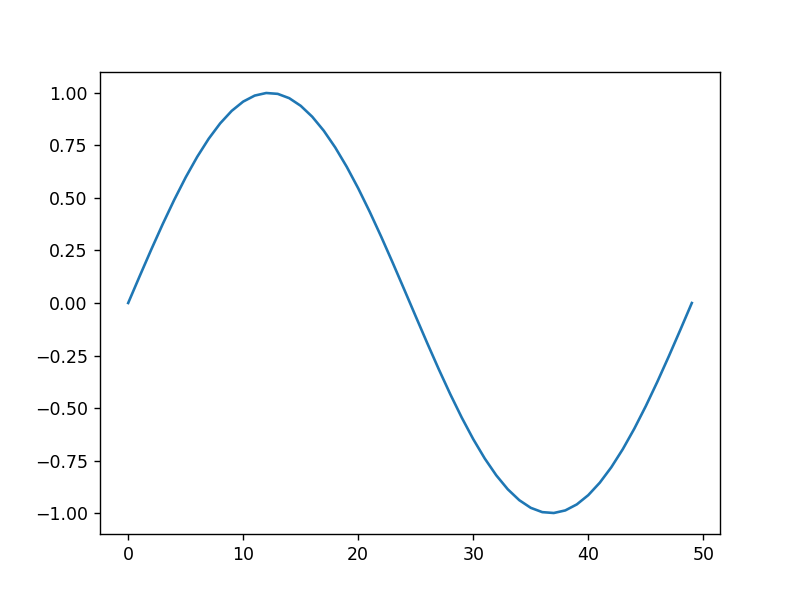

<IPython.core.display.Javascript object>


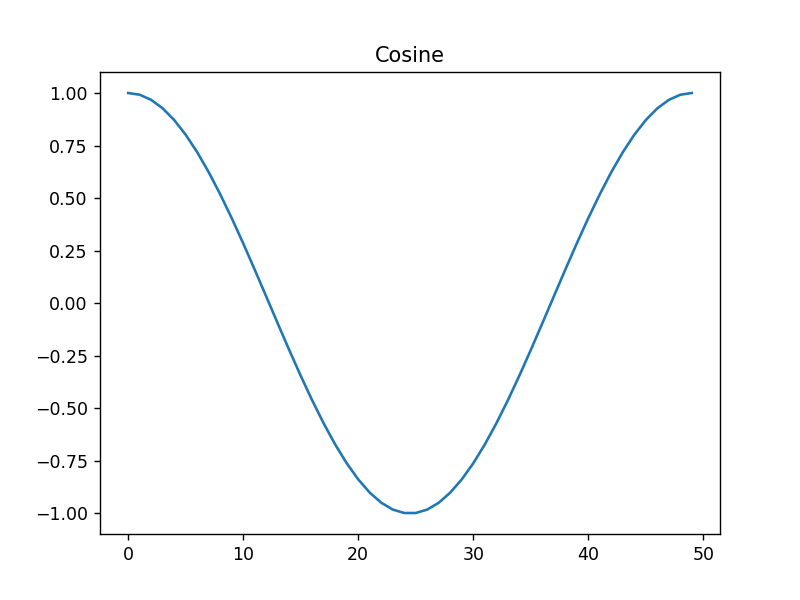

In [151]:
%matplotlib notebook

# and... matplotlib! this is also built on numpy
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0,2*np.pi,50)

x = np.sin(t)
y = np.cos(t)

plt.figure() # this creates an instance of a figure
plt.plot(x) # this calls plot(x) from the module itself
# so plots in the last instance of figure
# this recreates the behavior of matlab

plt.figure() # creates a new instance of a figure
plt.plot(y) # plots in the newest instance of a figure
plt.title("Cosine") # sets the title for the newest instance of a figure

# to get around this, it is better to do
# f1 = plt.figure(x)
# f1.plot(x)
# this way, you have a handle on the figures!

<IPython.core.display.Javascript object>


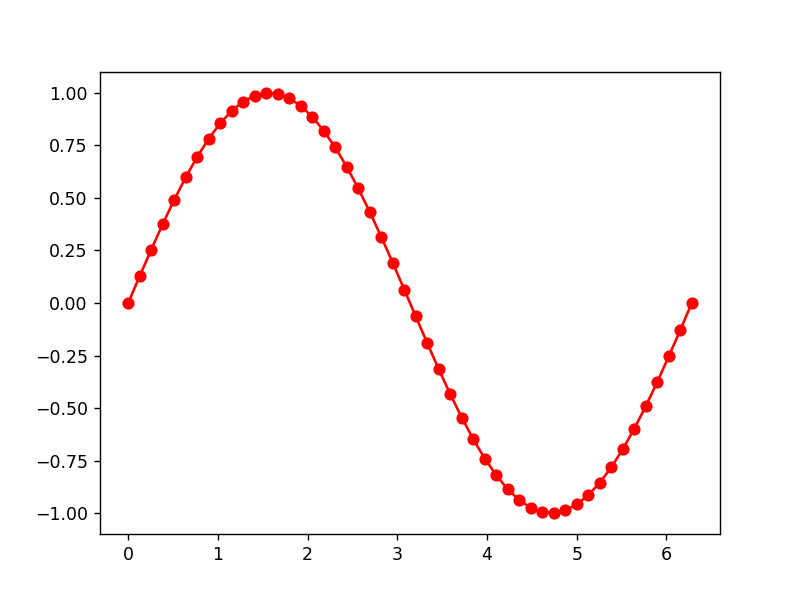

In [155]:
x = np.linspace(0,2*np.pi,50)
y1 = np.sin(x)
y2 = np.sin(2*x)

plt.figure()
plt.plot(x, y1, 'r-o')